In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from Bio import Entrez
from tqdm import tqdm
import pickle

In [2]:
data = pd.read_csv (r'data/SFARI-Genes.csv')
cols = data.columns
N, D = data.shape

In [3]:
def save_to_txt_file(contents, filename):
    DIR = os.getcwd() + "/results/" + filename
    
    with open(DIR, "w") as f:
        f.write(contents)
        
def save_to_pickle_file(contents, filename):
    DIR = os.getcwd() + "/data/" + filename
    
    with open(DIR, "wb") as handle:
        pickle.dump(contents, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
def open_pickle_file(filename):
    DIR = os.getcwd() + "/data/" + filename
    
    with open(DIR, "rb") as handle:
        data = pickle.load(handle)
        
    return data

def save_to_npy_file(contents, filename):
    np.save(os.getcwd() + "/data/" + filename, contents)
    
def open_npy_file(filename):
    np.load(os.getcwd() + "/data/" + filename, allow_pickle=True)
    
def parse_eid():
    DIR = os.getcwd() + "/results/task2-1-eid.txt"
    eid = {}
    
    with open(DIR) as f:
        lines = f.readlines()
        
    for l in lines:
        t1 = l.replace("\n", "").split(": ")
        gene = t1[0]

        if len(t1) > 1:
            eid[gene] = t1[1].split(", ")
        else:
            eid[gene] = ""
               
    return eid

def get_entrezs(symbols):
    entrezs = {}
    
    for s in symbols:
        entrezs[s] = eid[s]
        
    return entrezs

In [4]:
eid = parse_eid()

# Task 1

In [5]:
gene_scores = data["gene-score"]
score_indexes =  gene_scores[gene_scores == 1].index
symbols = data["gene-symbol"].filter(items=score_indexes, axis=0)  

print(symbols)

6         ACTB
14        ADNP
16        ADSL
17        AFF2
27       AHDC1
         ...  
984       UBR1
998     ZBTB20
1004    ZNF292
1006    ZNF462
1019    ZMYND8
Name: gene-symbol, Length: 206, dtype: object


In [9]:
ncbi_ids = get_entrezs(symbols)

txt = ""
for s in symbols:
    txt += "\n".join(ncbi_ids[s]) + "\n"
    print(ncbi_ids[s])
    
save_to_txt_file(txt, "task3.1-gs1-ids.txt")

['60']
['23394']
['158']
['2334']
['27245']
['7915']
['287']
['288']
['29123']
['23229']
['57492']
['170302']
['55870']
['80816']
['546']
['26053']
['1175']
['29994']
['10295']
['53335']
['673']
['9024']
['773']
['775']
['777']
['55799']
['4076']
['8573']
['54897']
['6792']
['56853']
['283489']
['1106']
['1107']
['55636']
['57680']
['23152']
['4849']
['1387']
['7812']
['10664']
['1499']
['8452']
['11151']
['1654']
['10522']
['1717']
['23181']
['1742']
['1760']
['1788']
['1808']
['1826']
['1778']
['1859']
['22924']
['79813']
['8666']
['1995']
['2033']
['2332']
['2290']
['27086']
['93986']
['2562']
['2561']
['64599']
['26058']
['2891']
['2670']
['2770']
['2904']
['3069']
['283450']
['3097']
['3188']
['3192']
['3265']
['23096']
['64207']
['284058']
['83473']
['3745']
['3786']
['51780']
['10765']
['8242']
['23135']
['9778']
['4297']
['58508']
['55904']
['51111']
['8216']
['54551']
['55777']
['79143']
['4204']
['8861']
['57689']
['9969']
['23389']
['4208']
['4212']
['283078']
['4130']
['230

In [10]:
display(data.sort_values("gene-score"))

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
838,9,SLC9A6,solute carrier family 9 (sodium/hydrogen excha...,ENSG00000198689,X,"Rare Single Gene Mutation, Syndromic, Functional",1.0,1,18
398,9,HRAS,v-Ha-ras Harvey rat sarcoma viral oncogene hom...,ENSG00000174775,11,"Rare Single Gene Mutation, Syndromic, Genetic ...",1.0,0,12
802,9,SETD5,SET domain containing 5,ENSG00000168137,3,"Rare Single Gene Mutation, Syndromic",1.0,1,28
395,9,HNRNPU,heterogeneous nuclear ribonucleoprotein U,ENSG00000153187,1,"Rare Single Gene Mutation, Syndromic, Functional",1.0,1,29
394,9,HNRNPH2,heterogeneous nuclear ribonucleoprotein H2,ENSG00000126945,X,"Rare Single Gene Mutation, Syndromic",1.0,0,15
...,...,...,...,...,...,...,...,...,...
982,9,WASF1,WAS protein family member 1,ENSG00000112290,6,Syndromic,NaN,1,1
987,9,WDR26,WD repeat domain 26,ENSG00000162923,1,"Rare Single Gene Mutation, Syndromic",NaN,1,6
991,9,XPC,"xeroderma pigmentosum, complementation group C",ENSG00000154767,3,"Rare Single Gene Mutation, Syndromic",NaN,1,11
996,9,YY1,YY1transcription factor,ENSG00000100811,14,"Rare Single Gene Mutation, Syndromic, Functional",NaN,1,5


# Task 2

In [6]:
clusters = pd.read_csv(os.getcwd() + "/data/task3-2-MCL-clusters.tsv", sep="\t")

In [7]:
clusters = clusters.sort_values("cluster number")
display(clusters)

,#clustering method,cluster number,cluster color,gene count,protein name,protein identifier,protein description
0,MCL,1,Red,32,ADSL,9606.ENSP00000485525,Adenylosuccinate lyase; Catalyzes two non-sequ...
31,MCL,1,Red,32,TRIO,9606.ENSP00000339299,Triple functional domain protein; Guanine nucl...
30,MCL,1,Red,32,TANC2,9606.ENSP00000387593,"Protein TANC2; Tetratricopeptide repeat, ankyr..."
29,MCL,1,Red,32,SYNGAP1,9606.ENSP00000403636,Ras/Rap GTPase-activating protein SynGAP; Majo...
28,MCL,1,Red,32,SYN1,9606.ENSP00000295987,Synapsin-1; Neuronal phosphoprotein that coats...
...,...,...,...,...,...,...,...
186,MCL,37,Hot Pink 2,1,ANK3,9606.ENSP00000280772,"Ankyrin-3; In skeletal muscle, required for co..."
187,MCL,38,Hot Pink,1,KDM5C,9606.ENSP00000364550,Lysine-specific demethylase 5C; Histone demeth...
188,MCL,39,Pale Violet Red,1,ZMYND8,9606.ENSP00000420095,Protein kinase C-binding protein 1; May act as...
189,MCL,40,Pink,1,GIGYF2,9606.ENSP00000387170,GRB10-interacting GYF protein 2; Key component...


In [57]:
cluster_sizes = clusters.value_counts("cluster number")
top2_cluster_ids = list(top2_clusters.iloc[0:2].index)
top2_cluster_sizes = list(top2_clusters.iloc[0:2])

In [58]:
top2_cluster_genes = []

for i, cid in enumerate(top2_cluster_ids):
    idxs = clusters.index[clusters["cluster number"] == cid].tolist()
    cluster_genes = clusters.filter(items=idxs, axis=0).sort_values("protein name")["protein name"].values
    top2_cluster_genes.append(cluster_genes)
    file_output_str = " ".join(cluster_genes)
    save_to_txt_file(file_output_str, f"part3-task2-pdb-c{i+1}.txt")

In [60]:
top2_cluster_genes[1].size

25

In [8]:
def load_pdb_txt_file(filename):
    DIR = os.getcwd() + "/data/"
    data = open(DIR + filename + ".txt", "r").read()
    sep_data = data.split("\n")
    if sep_data[-1] == "":
        sep_data = sep_data[0:-1]
    output = np.array([line.split("\t") for line in sep_data], dtype=object)
    
    idxs = output[:,0].astype(int)
    cats = output[:,1]
    num_genes = output[:,2].astype(int)
    ghg = np.array([val[:-1] for val in output[:,3]]).astype(float)
    ghp = np.array([val[:-1] for val in output[:,4]]).astype(float)
    
    df_data = np.vstack((idxs, cats, num_genes, ghg, ghp)).T
    print(df_data.shape)
    return pd.DataFrame(df_data, columns=["1", "2", "3", "4", "5"])

In [10]:
c1 = load_pdb_txt_file("task3-2-pdb-c1")
c2 = load_pdb_txt_file("task3-2-pdb-c2")

(13, 5)
(9, 5)


In [11]:
c1, c2 = c1.sort_values("3"), c2.sort_values("3")
num_rows = [c1.shape[0], c2.shape[0]]
num_genes = [c1["3"].values, c2["3"].values]
names = [c1["2"].values, c2["2"].values]

Text(-1.3, 0.5, 'Pathway category (Accession)')

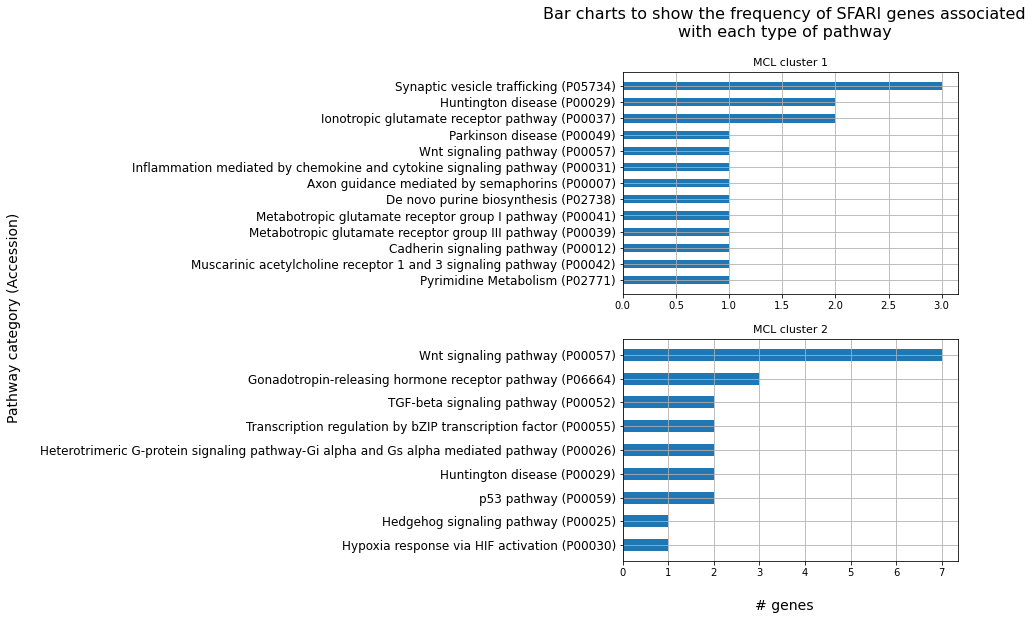

In [111]:
fig, axs = plt.subplots(2)

for i in range(2):
    ticks = np.arange(num_rows[i])
    axs[i].barh(ticks, width=num_genes[i], height=0.5)
    axs[i].set_yticks(ticks)
    axs[i].set_yticklabels(names[i], fontsize=12)
    axs[i].figure.set_figheight(num_rows[i])
    axs[i].set_title(f"MCL cluster {i+1}",fontsize=11)
    axs[i].grid(True)

fig.suptitle("Bar charts to show the frequency of SFARI genes associated\nwith each type of pathway", fontsize=16)
fig.text(0.5, 0.05, '# genes', ha='center', fontsize=14)
fig.text(-1.3, 0.5, 'Pathway category (Accession)', va='center', rotation='vertical', fontsize=14)

In [12]:
def get_ticks(labels, master_labels, master_ticks):
    gaps = []
    ticks = master_ticks
    
    for i, l in enumerate(master_labels):
        if not l in labels:
            gaps.append(i)

    return np.delete(ticks, gaps)

def get_all_unique_cats(arrs):
    return np.unique(np.concatenate(arrs))

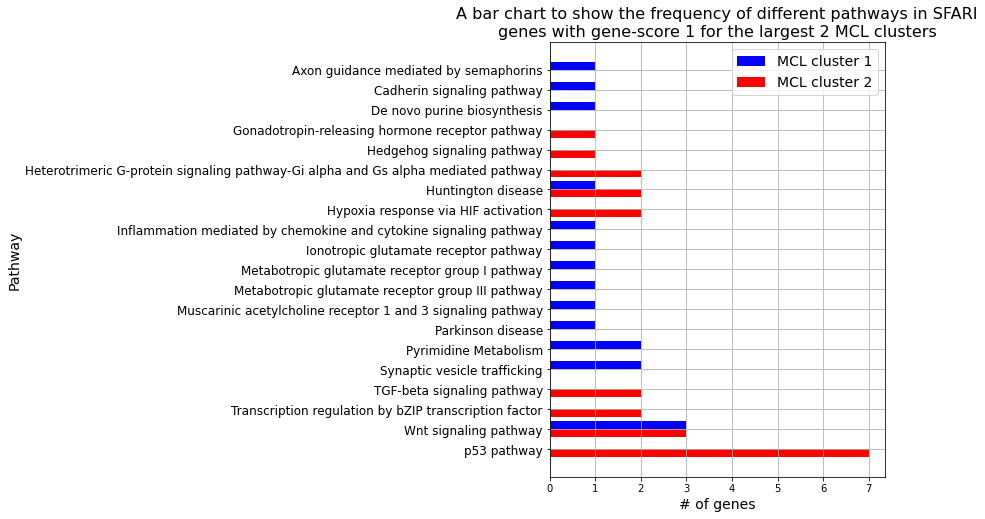

In [15]:
ax = plt.subplot()

c1, c2 = c1.sort_values("3"), c2.sort_values("3")
num_rows = [c1.shape[0], c2.shape[0]]
num_genes = [c1["3"].values, c2["3"].values]
#num_genes = [100*n/np.sum(n) for n in num_genes]
names = [c1["2"].values, c2["2"].values]

og_process_labels = get_all_unique_cats(names)
all_process_labels = np.array([s[:-9] for s in og_process_labels])

num_ticks = all_process_labels.size

width = 0.4
loc = 0.2
scale = 1000
offsets = [loc, -loc]
colours = ["b", "r"]
ticks = np.arange(num_ticks)*-1
plt_labels = ["MCL cluster 1", "MCL cluster 2"]


for f in range(2):
    f_ticks = get_ticks(names[f], og_process_labels, ticks)
    ax.barh(f_ticks + offsets[f], width=num_genes[f], height=width, color=colours[f], align="center", label=plt_labels[f])
    
ax.set_yticks(ticks)
ax.set_yticklabels(all_process_labels, fontsize=12)
ax.set_ylabel("Pathway", fontsize=14)
ax.set_xlabel("# of genes", fontsize=14)
ax.set_title("A bar chart to show the frequency of different pathways in SFARI\ngenes with gene-score 1 for the largest 2 MCL clusters", fontsize=16)
ax.legend(fontsize=14)
ax.figure.set_figheight(8)
plt.grid(True)

# Extension

In [16]:
clusters = pd.read_csv(os.getcwd() + "/data/task3-ext-MCL-clusters-allGenes.tsv", sep="\t")

In [22]:
clusters = clusters.sort_values("cluster number")
display(clusters)

,#clustering method,cluster number,cluster color,gene count,protein name,protein identifier,protein description
0,MCL,1,Red,50,ARNT2,9606.ENSP00000307479,Aryl hydrocarbon receptor nuclear translocator...
27,MCL,1,Red,50,KMT2A,9606.ENSP00000436786,[histone h3]-lysine4 n-trimethyltransferase ml...
28,MCL,1,Red,50,KMT2C,9606.ENSP00000262189,[histone h3]-lysine4 n-trimethyltransferase ml...
29,MCL,1,Red,50,KMT2E,9606.ENSP00000312379,[histone h3]-lysine4 n-trimethyltransferase ml...
30,MCL,1,Red,50,MBD3,9606.ENSP00000412302,Methyl-CpG-binding domain protein 3; Acts as t...
...,...,...,...,...,...,...,...
977,MCL,372,Light Coral 5,1,QRICH1,9606.ENSP00000378830,Glutamine-rich protein 1; Glutamine rich 1
978,MCL,373,Light Coral 7,1,HYDIN,9606.ENSP00000377197,"Hydin, axonemal central pair apparatus protein..."
979,MCL,374,Light Coral 9,1,KIF13B,9606.ENSP00000427900,Kinesin-like protein KIF13B; Involved in reorg...
980,MCL,375,Light Coral 11,1,ZBTB20,9606.ENSP00000419153,Zinc finger and BTB domain-containing protein ...


In [26]:
cluster_sizes = clusters.value_counts("cluster number")
top2_cluster_ids = [1, 2]
#top2_cluster_sizes = list(clusters.iloc[0:2])

In [27]:
top2_cluster_ids

[1, 2]

In [35]:
top2_cluster_genes = []

for i, cid in enumerate(top2_cluster_ids):
    idxs = clusters.index[clusters["cluster number"] == cid].tolist()
    cluster_genes = clusters.filter(items=idxs, axis=0).sort_values("protein name")["protein name"].values
    top2_cluster_genes.append(cluster_genes)
    file_output_str = " ".join(cluster_genes)
    save_to_txt_file(file_output_str, f"part3-ext-pdb-c{i+1}.txt")

50
47


In [30]:
c1 = load_pdb_txt_file("task3-ext-pdb-c1-pathway")
c2 = load_pdb_txt_file("task3-ext-pdb-c2-pathway")

(11, 5)
(12, 5)


In [31]:
c1, c2 = c1.sort_values("3"), c2.sort_values("3")
num_rows = [c1.shape[0], c2.shape[0]]
num_genes = [c1["3"].values, c2["3"].values]
names = [c1["2"].values, c2["2"].values]

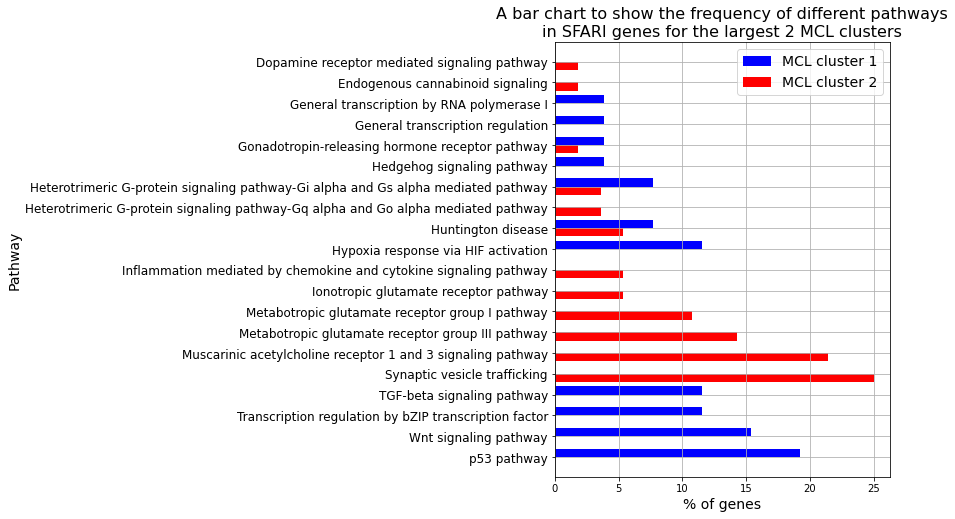

In [37]:
ax = plt.subplot()

c1, c2 = c1.sort_values("3"), c2.sort_values("3")
num_rows = [c1.shape[0], c2.shape[0]]
num_genes = [c1["3"].values, c2["3"].values]
num_genes = [100*n/np.sum(n) for n in num_genes]
names = [c1["2"].values, c2["2"].values]

og_process_labels = get_all_unique_cats(names)
all_process_labels = np.array([s[:-9] for s in og_process_labels])

num_ticks = all_process_labels.size

width = 0.4
loc = 0.2
scale = 1000
offsets = [loc, -loc]
colours = ["b", "r"]
ticks = np.arange(num_ticks)*-1
plt_labels = ["MCL cluster 1", "MCL cluster 2"]


for f in range(2):
    f_ticks = get_ticks(names[f], og_process_labels, ticks)
    ax.barh(f_ticks + offsets[f], width=num_genes[f], height=width, color=colours[f], align="center", label=plt_labels[f])
    
ax.set_yticks(ticks)
ax.set_yticklabels(all_process_labels, fontsize=12)
ax.set_ylabel("Pathway", fontsize=14)
ax.set_xlabel("% of genes", fontsize=14)
ax.set_title("A bar chart to show the frequency of different pathways\nin SFARI genes for the largest 2 MCL clusters", fontsize=16)
ax.legend(fontsize=14)
ax.figure.set_figheight(8)
plt.grid(True)